In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import duckdb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [102]:
df = pd.read_csv('USMNT_2023.csv')
df.head()

,Player,Position,Birthday,Age,Club,League,Market_Value,Highest Market Value,League Appearances,Goals Conceded,...,Starting Eleven %,Club Minutes %,Club Goals,Club Assists,Goal Participation %,Total Minutes,US Caps,US Goals,US Assists,US Total Minutes
0,Christian Pulisic,LW,September-18-1998,24,Chelsea,EPL,25000000,60000000,24,0,...,21,24,1,1,5,1013,57,25,16,4194
1,Brenden Aaronson,CAM,October-22-2000,22,Leeds United,EPL,25000000,30000000,36,0,...,74,70,1,3,8,2588,29,7,5,1662
2,Gio Reyna,CAM,November-13-2002,20,Borussia Dortmund,Bundesliga,25000000,42000000,22,0,...,12,20,7,2,11,1016,17,4,3,1102
3,Folarin Balogun,CF,July-3-2001,21,Stade Reims,Ligue 1,30000000,30000000,37,0,...,89,88,21,3,53,3146,2,1,0,151
4,Weston McKennie,CM,August-28-1998,24,Leeds United,EPL,18000000,25000000,19,0,...,84,84,0,1,5,3038,42,11,5,3386


balo = pd.DataFrame({'Player':['Folarin Balogun'], 'Position':['CF'], 'Birthday':['July-3-2001'], 'Age': [21], 'Club':['Stade Reims'],'League':['Ligue 1'], 'Market_Value':['25000000']})
df = pd.concat([df, balo])
df.tail()

In [103]:
df.columns = df.columns.str.replace(' ', '_')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Player                68 non-null     object
 1   Position              68 non-null     object
 2   Birthday              68 non-null     object
 3   Age                   68 non-null     int64 
 4   Club                  68 non-null     object
 5   League                68 non-null     object
 6   Market_Value          68 non-null     int64 
 7   Highest_Market_Value  68 non-null     int64 
 8   League_Appearances_   68 non-null     int64 
 9   Goals_Conceded        68 non-null     int64 
 10  Clean_Sheet           68 non-null     int64 
 11  Yellow_Cards          68 non-null     int64 
 12  Red_Cards             68 non-null     int64 
 13  Starting_Eleven_%     68 non-null     int64 
 14  Club_Minutes_%        68 non-null     int64 
 15  Club_Goals            68 non-null     int6

I want to be able to sort by the date the players were born so I need to change the months name to its numerical counterpart. But before I can get to that I need to expand the date to replace the month

In [105]:
months = {'January': 1, 'February':2, 'March':3, 'April':4, 'May':5,'June':6,'July':7, 'August':8,'September':9,'October':10, 'November':11, 'December':12}

In [106]:
df[['Total_Minutes','Club_Goals','Club_Assists','US_Goals', 'US_Assists','US_Total_Minutes']] = df[['Total_Minutes','Club_Goals','Club_Assists','US_Goals', 'US_Assists','US_Total_Minutes']].astype('float')

In [107]:
df['Birthday'] = df['Birthday'].astype('string')
df['month'] = df['Birthday'].str.split('-', expand = True)[0]
df['day'] = df['Birthday'].str.split('-', expand = True)[1]
df['year'] = df['Birthday'].str.split('-', expand = True)[2]

Using the map function to replace the name to the numerical counterpart

In [108]:
df['month'] = df['month'].map(months)

In [109]:
df = df.drop(['month','day','year'],axis =1)

In [110]:
df['Birthday'] = pd.to_datetime(df['Birthday'])

I want to add new columns giving me the goals + assists per 90 minutes of club soccer as well as a column for goals and assists per 90 minutes

In [111]:
df['Club_GA'] = ((df['Club_Goals'] + df['Club_Assists']) / (df['Total_Minutes'] / 90.0)).round(3)

df['US_GA'] = ((df['US_Goals'] + df['US_Assists']) / (df['US_Total_Minutes'] / 90)).round(3)


In [112]:
df.head()

,Player,Position,Birthday,Age,Club,League,Market_Value,Highest_Market_Value,League_Appearances_,Goals_Conceded,...,Club_Goals,Club_Assists,Goal_Participation_%,Total_Minutes,US_Caps,US_Goals,US_Assists,US_Total_Minutes,Club_GA,US_GA
0,Christian Pulisic,LW,1998-09-18,24,Chelsea,EPL,25000000,60000000,24,0,...,1.0,1.0,5,1013.0,57,25.0,16.0,4194.0,0.178,0.880
1,Brenden Aaronson,CAM,2000-10-22,22,Leeds United,EPL,25000000,30000000,36,0,...,1.0,3.0,8,2588.0,29,7.0,5.0,1662.0,0.139,0.650
2,Gio Reyna,CAM,2002-11-13,20,Borussia Dortmund,Bundesliga,25000000,42000000,22,0,...,7.0,2.0,11,1016.0,17,4.0,3.0,1102.0,0.797,0.572
3,Folarin Balogun,CF,2001-07-03,21,Stade Reims,Ligue 1,30000000,30000000,37,0,...,21.0,3.0,53,3146.0,2,1.0,0.0,151.0,0.687,0.596
4,Weston McKennie,CM,1998-08-28,24,Leeds United,EPL,18000000,25000000,19,0,...,0.0,1.0,5,3038.0,42,11.0,5.0,3386.0,0.030,0.425


In [113]:
df_s = df[df['US_Caps'] >= 10]
df_s.sort_values(by = 'US_GA', ascending = False).head()

,Player,Position,Birthday,Age,Club,League,Market_Value,Highest_Market_Value,League_Appearances_,Goals_Conceded,...,Club_Goals,Club_Assists,Goal_Participation_%,Total_Minutes,US_Caps,US_Goals,US_Assists,US_Total_Minutes,Club_GA,US_GA
18,Jesus Ferreira,CF,2000-12-24,22,FC Dallas,MLS,8000000,8000000,18,0,...,10.0,0.0,48,1626.0,18,8.0,4.0,946.0,0.554,1.142
15,Ricardo Pepi,CF,2003-01-09,20,FC Groningen,Eredivisie,9000000,10000000,29,0,...,12.0,3.0,58,2746.0,16,7.0,3.0,883.0,0.492,1.019
0,Christian Pulisic,LW,1998-09-18,24,Chelsea,EPL,25000000,60000000,24,0,...,1.0,1.0,5,1013.0,57,25.0,16.0,4194.0,0.178,0.880
25,Jordan Morris,LW,1994-10-26,28,Seattle Sounders,MLS,5500000,5500000,16,0,...,9.0,0.0,38,1282.0,52,11.0,8.0,2153.0,0.632,0.794
45,Luca de le Torre,CM,1998-05-23,24,Celta,La Liga,3000000,3000000,28,0,...,0.0,2.0,5,1613.0,13,0.0,5.0,611.0,0.112,0.736


In [114]:
df.value_counts('League')

League
MLS                   26
EPL                    9
EFL Championship       5
Ligue 1                3
Eredivisie             3
Bundesliga             3
SPL                    3
Jupiler Pro League     2
La Liga                2
Liga MX                2
Serie A                1
Superligaen            1
Super Lig              1
Serie A (Brazil)       1
Belgian Pro League     1
Segunda Division       1
Primera Liga           1
Eliteserien            1
Bundesliga 2           1
USL Championship       1
dtype: int64

In [115]:
df['League'] = df['League'].str.replace('Jupiler Pro League', 'Belgian Pro League')

In [116]:
df.League.unique()

array(['EPL', 'Bundesliga', 'Ligue 1', 'La Liga', 'Serie A',
       'EFL Championship', 'SPL', 'Eredivisie', 'Belgian Pro League',
       'MLS', 'Super Lig', 'Liga MX', 'Primera Liga', 'Serie A (Brazil)',
       'Bundesliga 2', 'USL Championship', 'Eliteserien', 'Superligaen',
       'Segunda Division'], dtype=object)

The leagues broken down by country they are in:

* England - EPL, EFL Championship
* Scotland - SPL
* USA - MLS, USL Championship
* Belgium - Belgian Pro League
* France - Ligue 1
* Norway - Eliteserien
* Germany - Bundesliga 2, Bundesliga
* Spain - Segunda Division, La Liga
* Italy - Serie A
* Portugal - Primera Liga
* Brazil - Serie A (Brazil)
* Netherlands - Eredivisie
* Mexico - Liga MX
* Denmark - Superligaen
* Turkey - Super Lig








In [117]:
df['Country_of_League'] = df.loc[:,'League']

Add a new column which has the country where the league plays in

In [118]:
df.loc[df['Country_of_League'] == 'EPL','Country_of_League'] = 'England'
df.loc[df['Country_of_League'] == 'EFL Championship','Country_of_League'] = 'England'
df.loc[df['Country_of_League'] == 'SPL','Country_of_League'] = 'Scotland'
df.loc[df['Country_of_League'] == 'MLS','Country_of_League'] = 'USA'
df.loc[df['Country_of_League'] == 'USL Championship','Country_of_League'] = 'USA'
df.loc[df['Country_of_League'] == 'Belgian Pro League','Country_of_League'] = 'Belgium'
df.loc[df['Country_of_League'] == 'Ligue 1','Country_of_League'] = 'France'
df.loc[df['Country_of_League'] == 'Eliteserien','Country_of_League'] = 'Norway'
df.loc[df['Country_of_League'] == 'Bundesliga','Country_of_League'] = 'Germany'
df.loc[df['Country_of_League'] == 'Bundesliga 2','Country_of_League'] = 'Germany'
df.loc[df['Country_of_League'] == 'Segunda Division','Country_of_League'] = 'Spain'
df.loc[df['Country_of_League'] == 'La Liga','Country_of_League'] = 'Germany'
df.loc[df['Country_of_League'] == 'Serie A','Country_of_League'] = 'Italy'
df.loc[df['Country_of_League'] == 'Primera Liga','Country_of_League'] = 'Portugal'
df.loc[df['Country_of_League'] == 'Serie A (Brazil)','Country_of_League'] = 'Brazil'
df.loc[df['Country_of_League'] == 'Eredivisie','Country_of_League'] = 'Netherlands'
df.loc[df['Country_of_League'] == 'Liga MX','Country_of_League'] = 'Mexico'
df.loc[df['Country_of_League'] == 'Superligaen','Country_of_League'] = 'Denmark'
df.loc[df['Country_of_League'] == 'Super Lig','Country_of_League'] = 'Turkey'


In [119]:
df.head()

,Player,Position,Birthday,Age,Club,League,Market_Value,Highest_Market_Value,League_Appearances_,Goals_Conceded,...,Club_Assists,Goal_Participation_%,Total_Minutes,US_Caps,US_Goals,US_Assists,US_Total_Minutes,Club_GA,US_GA,Country_of_League
0,Christian Pulisic,LW,1998-09-18,24,Chelsea,EPL,25000000,60000000,24,0,...,1.0,5,1013.0,57,25.0,16.0,4194.0,0.178,0.880,England
1,Brenden Aaronson,CAM,2000-10-22,22,Leeds United,EPL,25000000,30000000,36,0,...,3.0,8,2588.0,29,7.0,5.0,1662.0,0.139,0.650,England
2,Gio Reyna,CAM,2002-11-13,20,Borussia Dortmund,Bundesliga,25000000,42000000,22,0,...,2.0,11,1016.0,17,4.0,3.0,1102.0,0.797,0.572,Germany
3,Folarin Balogun,CF,2001-07-03,21,Stade Reims,Ligue 1,30000000,30000000,37,0,...,3.0,53,3146.0,2,1.0,0.0,151.0,0.687,0.596,France
4,Weston McKennie,CM,1998-08-28,24,Leeds United,EPL,18000000,25000000,19,0,...,1.0,5,3038.0,42,11.0,5.0,3386.0,0.030,0.425,England


## Visualizations 

Text(0.5, 1.0, 'G/A Per 90 With USMNT and Club')

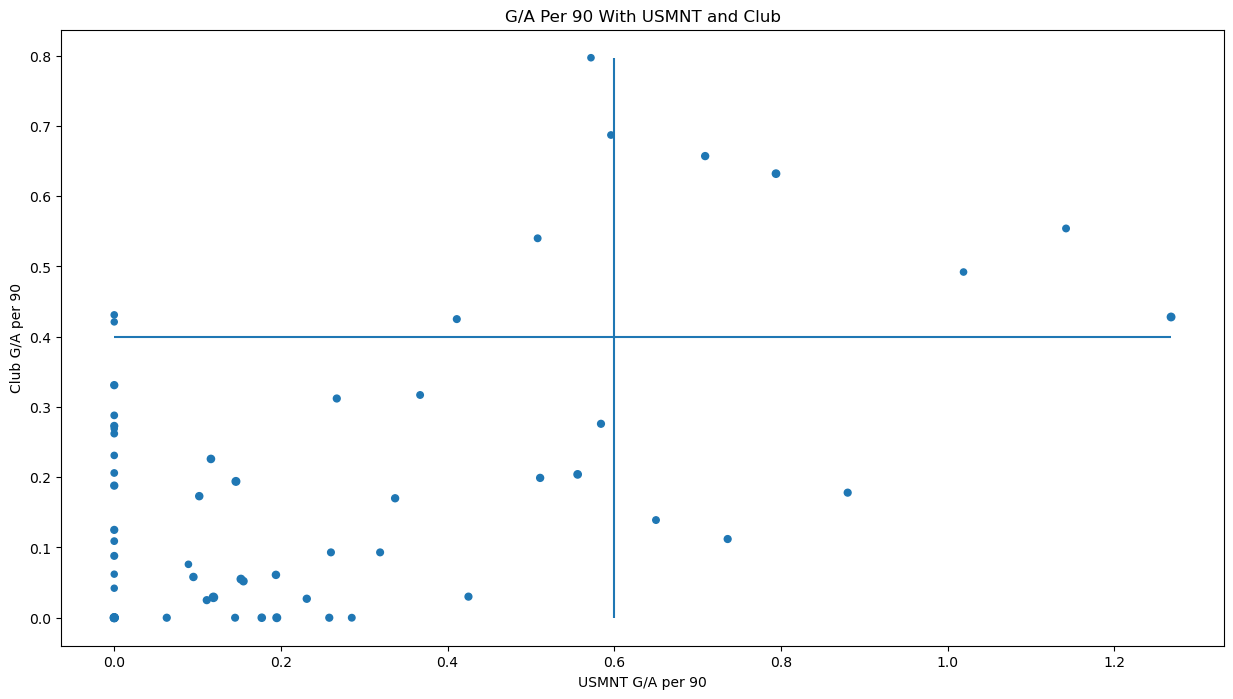

In [120]:
plt.figure(figsize = (15,8))

plt.scatter(df['US_GA'], df['Club_GA'], s = df['Age'])
plt.hlines(y = .4, xmin = min(df['US_GA']), xmax = max(df['US_GA']) )
plt.vlines(x = .6, ymin = min(df['Club_GA']), ymax = max(df['Club_GA']) )
plt.xlabel('USMNT G/A per 90')
plt.ylabel('Club G/A per 90')
plt.title('G/A Per 90 With USMNT and Club')




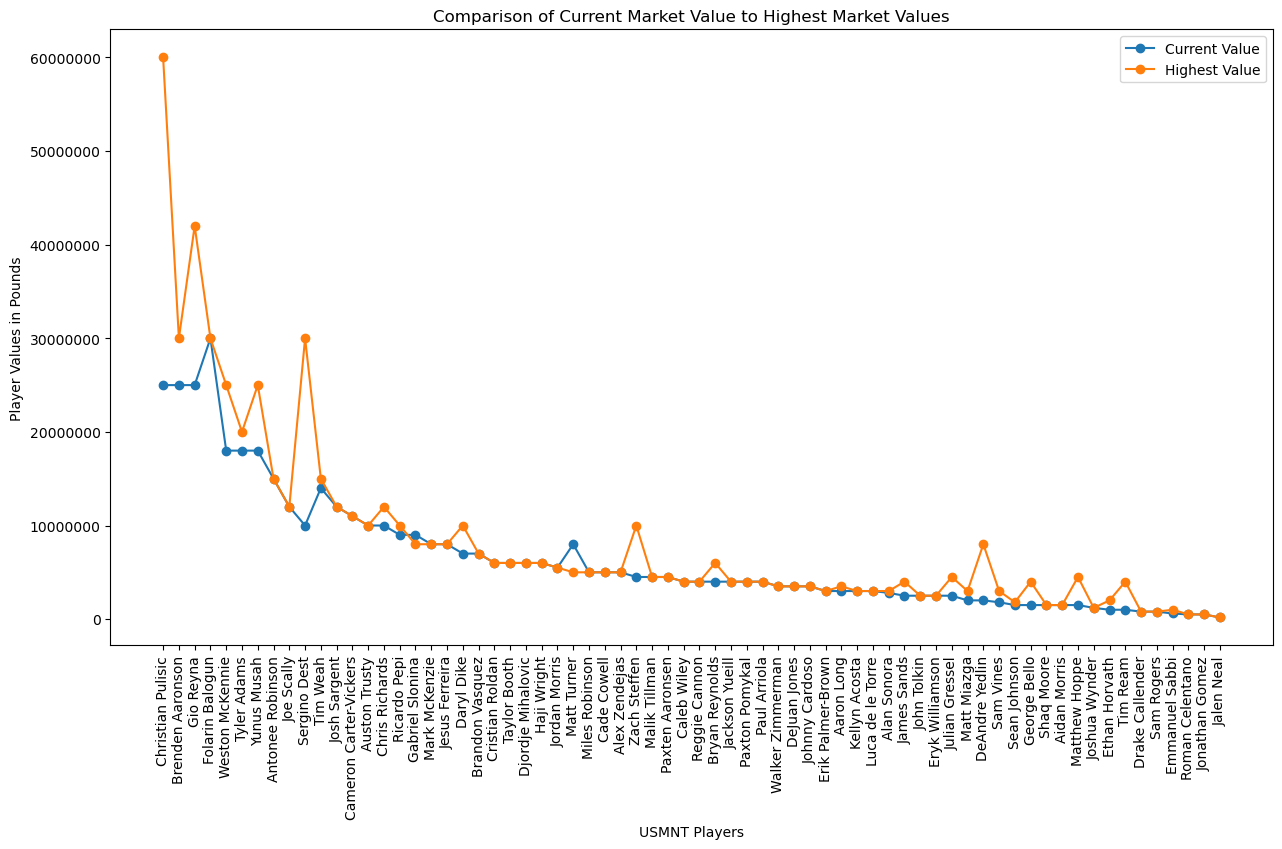

In [121]:
plt.figure(figsize = (15,8))
plt.plot(df['Player'],df['Market_Value'], marker = 'o')
plt.xticks(rotation = 90)

plt.plot(df['Player'], df['Highest_Market_Value'],marker = 'o')
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
plt.xlabel('USMNT Players')
plt.ylabel('Player Values in Pounds')
plt.legend(['Current Value', 'Highest Value'])
plt.title('Comparison of Current Market Value to Highest Market Values')
plt.show()

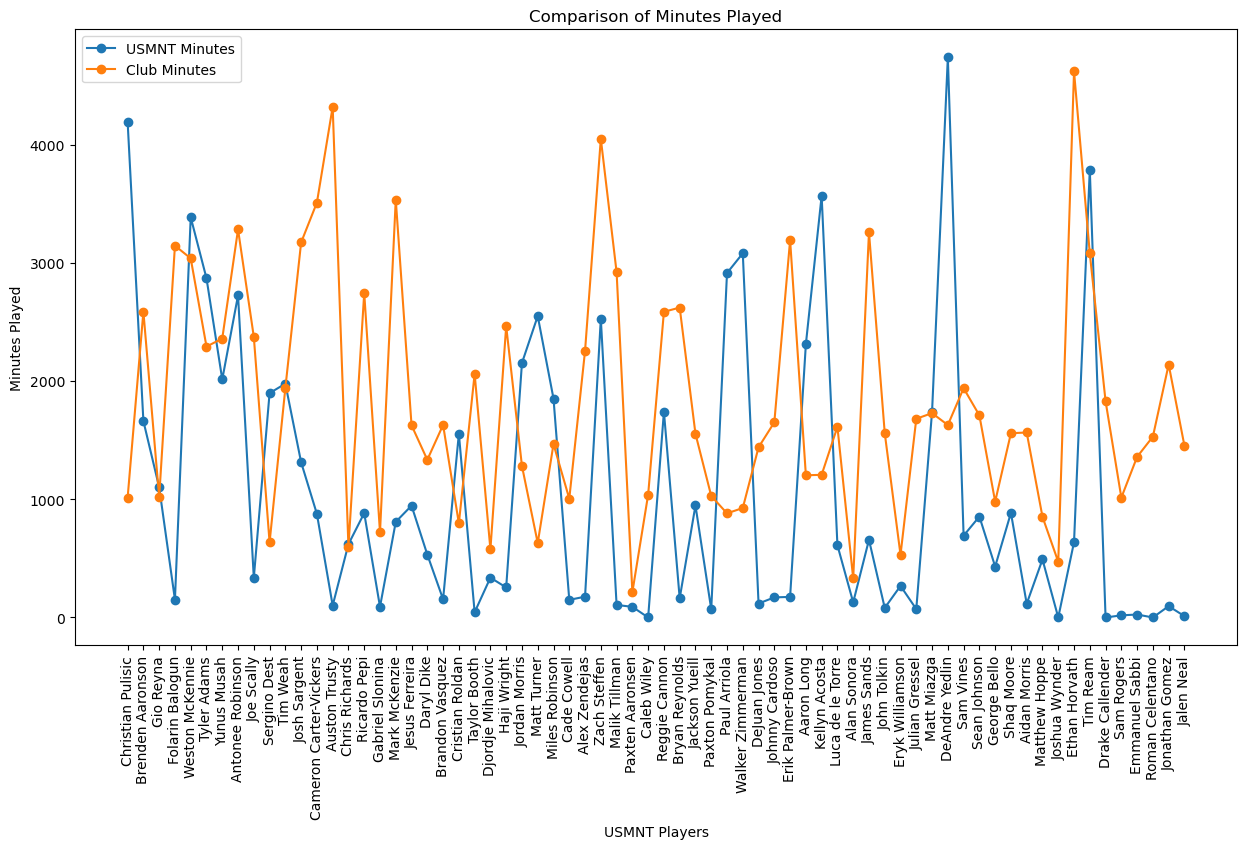

In [122]:
plt.figure(figsize = (15,8))
plt.plot(df['Player'],df['US_Total_Minutes'], marker = 'o')
plt.xticks(rotation = 90)

plt.plot(df['Player'], df['Total_Minutes'],marker = 'o')
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
plt.xlabel('USMNT Players')
plt.ylabel('Minutes Played')
plt.legend(['USMNT Minutes', 'Club Minutes'])
plt.title('Comparison of Minutes Played')
plt.show()

## Quick Insights Using DuckDB with SQL

total market value of the player pool

In [134]:
duckdb.query('SELECT SUM(Market_Value) FROM df ')

┌─────────────────────┐
│ sum("Market_Value") │
│       int128        │
├─────────────────────┤
│           446175000 │
└─────────────────────┘

all of the players valued over 15 million

In [128]:
duckdb.query('SELECT * FROM df WHERE Market_Value >= 15000000 ORDER BY Market_Value DESC')

┌───────────────────┬──────────┬─────────────────────┬───────┬───┬─────────┬────────┬───────────────────┐
│      Player       │ Position │      Birthday       │  Age  │ … │ Club_GA │ US_GA  │ Country_of_League │
│      varchar      │ varchar  │      timestamp      │ int64 │   │ double  │ double │      varchar      │
├───────────────────┼──────────┼─────────────────────┼───────┼───┼─────────┼────────┼───────────────────┤
│ Folarin Balogun   │ CF       │ 2001-07-03 00:00:00 │    21 │ … │   0.687 │  0.596 │ France            │
│ Christian Pulisic │ LW       │ 1998-09-18 00:00:00 │    24 │ … │   0.178 │   0.88 │ England           │
│ Brenden Aaronson  │ CAM      │ 2000-10-22 00:00:00 │    22 │ … │   0.139 │   0.65 │ England           │
│ Gio Reyna         │ CAM      │ 2002-11-13 00:00:00 │    20 │ … │   0.797 │  0.572 │ Germany           │
│ Weston McKennie   │ CM       │ 1998-08-28 00:00:00 │    24 │ … │    0.03 │  0.425 │ England           │
│ Tyler Adams       │ CDM      │ 1999-02-14 00

Players with over .5 for US g/a and over 10 caps

In [124]:
duckdb.query("SELECT * FROM df WHERE US_GA >= .5 AND US_Caps > 10 ORDER BY US_GA DESC")

┌───────────────────┬──────────┬─────────────────────┬───────┬───┬─────────┬────────┬───────────────────┐
│      Player       │ Position │      Birthday       │  Age  │ … │ Club_GA │ US_GA  │ Country_of_League │
│      varchar      │ varchar  │      timestamp      │ int64 │   │ double  │ double │      varchar      │
├───────────────────┼──────────┼─────────────────────┼───────┼───┼─────────┼────────┼───────────────────┤
│ Jesus Ferreira    │ CF       │ 2000-12-24 00:00:00 │    22 │ … │   0.554 │  1.142 │ USA               │
│ Ricardo Pepi      │ CF       │ 2003-01-09 00:00:00 │    20 │ … │   0.492 │  1.019 │ Netherlands       │
│ Christian Pulisic │ LW       │ 1998-09-18 00:00:00 │    24 │ … │   0.178 │   0.88 │ England           │
│ Jordan Morris     │ LW       │ 1994-10-26 00:00:00 │    28 │ … │   0.632 │  0.794 │ USA               │
│ Luca de le Torre  │ CM       │ 1998-05-23 00:00:00 │    24 │ … │   0.112 │  0.736 │ Germany           │
│ Brenden Aaronson  │ CAM      │ 2000-10-22 00

Players who have played over 2000 minutes for the USMNT ranked from youngest to oldest

In [125]:
duckdb.query("SELECT Player, Position, AGE, US_Caps,US_Total_Minutes, US_GA FROM df WHERE US_Total_Minutes > 2000 ORDER BY AGE ASC")

┌───────────────────┬──────────┬───────┬─────────┬──────────────────┬────────┐
│      Player       │ Position │  Age  │ US_Caps │ US_Total_Minutes │ US_GA  │
│      varchar      │ varchar  │ int64 │  int64  │      double      │ double │
├───────────────────┼──────────┼───────┼─────────┼──────────────────┼────────┤
│ Yunus Musah       │ CM       │    20 │      24 │           2014.0 │  0.089 │
│ Christian Pulisic │ LW       │    24 │      57 │           4194.0 │   0.88 │
│ Weston McKennie   │ CM       │    24 │      42 │           3386.0 │  0.425 │
│ Tyler Adams       │ CDM      │    24 │      36 │           2870.0 │  0.063 │
│ Antonee Robinson  │ LB       │    25 │      33 │           2725.0 │  0.231 │
│ Kellyn Acosta     │ CDM      │    27 │      58 │           3568.0 │  0.177 │
│ Jordan Morris     │ LW       │    28 │      52 │           2153.0 │  0.794 │
│ Matt Turner       │ GK       │    28 │      28 │           2550.0 │    0.0 │
│ Zach Steffen      │ GK       │    28 │      29 │  

US Under 23 players playing in top 5 leagues in europe (EPL, Bundesliga, La Liga, Serie A, and Serie 1 )

In [126]:
duckdb.query(" SELECT * FROM df WHERE Age < 23 AND League = 'EPL' OR league = 'Bundesliga' OR league = 'Serie A' OR league = 'La Liga' or league = 'Serie 1' ")

┌──────────────────┬──────────┬─────────────────────┬───────┬───┬─────────┬────────┬───────────────────┐
│      Player      │ Position │      Birthday       │  Age  │ … │ Club_GA │ US_GA  │ Country_of_League │
│     varchar      │ varchar  │      timestamp      │ int64 │   │ double  │ double │      varchar      │
├──────────────────┼──────────┼─────────────────────┼───────┼───┼─────────┼────────┼───────────────────┤
│ Gio Reyna        │ CAM      │ 2002-11-13 00:00:00 │    20 │ … │   0.797 │  0.572 │ Germany           │
│ Joe Scally       │ RB       │ 2002-12-31 00:00:00 │    20 │ … │     0.0 │    0.0 │ Germany           │
│ Paxten Aaronsen  │ CAM      │ 2003-08-26 00:00:00 │    19 │ … │   0.421 │    0.0 │ Germany           │
│ Sergino Dest     │ RB       │ 2000-11-03 00:00:00 │    22 │ … │     0.0 │  0.285 │ Italy             │
│ Yunus Musah      │ CM       │ 2002-11-29 00:00:00 │    20 │ … │   0.076 │  0.089 │ Germany           │
│ Luca de le Torre │ CM       │ 1998-05-23 00:00:00 │  

Under 20 players who have played over 500 minutes for their club

In [127]:
duckdb.query("SELECT * FROM df WHERE AGE < 20 AND Total_Minutes > 500 ORDER BY Total_Minutes DESC")

┌─────────────────┬──────────┬─────────────────────┬───────┬───┬─────────┬────────┬───────────────────┐
│     Player      │ Position │      Birthday       │  Age  │ … │ Club_GA │ US_GA  │ Country_of_League │
│     varchar     │ varchar  │      timestamp      │ int64 │   │ double  │ double │      varchar      │
├─────────────────┼──────────┼─────────────────────┼───────┼───┼─────────┼────────┼───────────────────┤
│ Jonathan Gomez  │ LB       │ 2003-09-01 00:00:00 │    19 │ … │   0.042 │    0.0 │ Spain             │
│ Jalen Neal      │ CB       │ 2003-08-24 00:00:00 │    19 │ … │   0.062 │    0.0 │ USA               │
│ Caleb Wiley     │ LB       │ 2004-12-22 00:00:00 │    18 │ … │   0.433 │   NULL │ USA               │
│ Cade Cowell     │ LW       │ 2003-10-14 00:00:00 │    19 │ … │   0.269 │    0.0 │ USA               │
│ Gabriel Slonina │ GK       │ 2004-05-15 00:00:00 │    19 │ … │     0.0 │    0.0 │ England           │
├─────────────────┴──────────┴─────────────────────┴───────┴───┴